### PROBLEM STATEMENT

##### The store does not let customers purchase a whole album, and then add individual tracks to that same purchase (unless they do that by choosing each track manually). When customers purchase albums they are charged the same price as if they had purchased each of those tracks separately.

##### Management are currently considering changing their purchasing strategy to save money. The strategy they are considering is to purchase only the most popular tracks from each album from record companies, instead of purchasing every track from an album.

##### We have been asked to find out what percentage of purchases are individual tracks vs whole albums, so that management can use this data to understand the effect this decision might have on overall revenue.

In [1]:
# Import libraries for sqllite, pandas and visualization
import numpy as np
import sqlite3 as sq3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Display plots within the notebook
%matplotlib inline

In [3]:
# Function to Run a sql query and return a pandas dataframe
def run_query(q):
    with sq3.connect('chinook.db') as conn:
        return pd.read_sql(q, conn)
    

In [4]:
# Function to take sqlcommand as an argument and execute it using the sqlite module.
def run_command(cmd):
    with sq3.connect('chinook.db') as conn:
        return conn.execute(cmd)

In [5]:
# Function to display all the tables and views in the database
def show_tables(q):
    return run_query(q)

In [6]:
q = 'SELECT * FROM invoice_line WHERE invoice_id = 1 AND quantity = 1'
df = show_tables(q)
df

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1
1,2,1,1159,0.99,1
2,3,1,1160,0.99,1
3,4,1,1161,0.99,1
4,5,1,1162,0.99,1
5,6,1,1163,0.99,1
6,7,1,1164,0.99,1
7,8,1,1165,0.99,1
8,9,1,1166,0.99,1
9,10,1,1167,0.99,1


In [7]:
# Query to find the types of genres and the total number of tracks sold 
#in absolute numbers and percentages.

q1 = """WITH GENRE_TRACK AS 
        (
            SELECT
                G.NAME,
                T.TRACK_ID
            FROM GENRE G
            INNER JOIN TRACK T ON G.GENRE_ID = T.GENRE_ID
        )
            
        SELECT
            G.NAME GENRE,
            COUNT(IL.QUANTITY) NO_OF_TRACKS
        FROM INVOICE_LINE IL
        INNER JOIN GENRE_TRACK G ON G.TRACK_ID = IL.TRACK_ID
        GROUP BY G.NAME
        ORDER BY NO_OF_TRACKS DESC"""

In [8]:
# Run the query and convert the data into pandas dataframe
df = show_tables(q1)
df

,GENRE,NO_OF_TRACKS
0,Rock,2635
1,Metal,619
2,Alternative & Punk,492
3,Latin,167
4,R&B/Soul,159
5,Blues,124
6,Jazz,121
7,Alternative,117
8,Easy Listening,74
9,Pop,63


In [9]:
# Add the column for percentage of tracks for each genre
df['Percentage'] = df['NO_OF_TRACKS']*100/df['NO_OF_TRACKS'].sum()
df

,GENRE,NO_OF_TRACKS,Percentage
0,Rock,2635,55.392054
1,Metal,619,13.012403
2,Alternative & Punk,492,10.342653
3,Latin,167,3.510616
4,R&B/Soul,159,3.342443
5,Blues,124,2.606685
6,Jazz,121,2.543620
7,Alternative,117,2.459533
8,Easy Listening,74,1.555602
9,Pop,63,1.324364


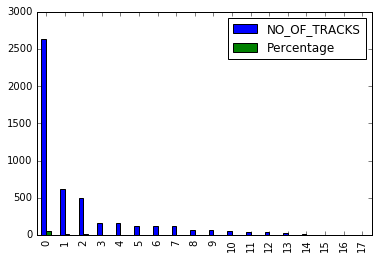

In [10]:
df.plot(kind='bar')

In [11]:
# Change the index to Genre names
df.set_index("GENRE",drop=True,inplace=True)

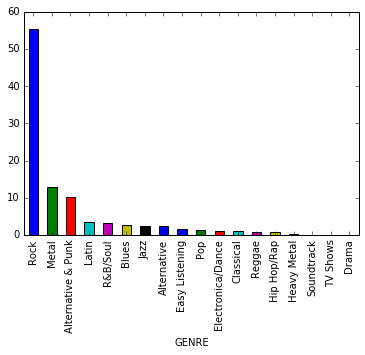

In [12]:
df['Percentage'].plot(kind="bar")

#### The Top 4 Genres of the Chinnok store are Rock, Metal, Alternative & Punk, Latin, with Rock having more than 50% of the track type which makes it a clear choice of track type genre to sell in the store. Rock & Metal are more the modern music types which is very popular with the younger generation, so it could be very well that Chinook attracts a lot of customers among the younger population

In [13]:
# Query to find the employees who have performed better than others, based on total amount purchased by the customers associated to the employee

q = """SELECT
            e.first_name || " " || e.last_name Name,
            e.title Title,
            e.birthdate BirthDate,
            e.hire_date HireDate,
            SUM(i.total) Total_sales
        FROM employee e
        INNER JOIN customer c ON e.employee_id = c.support_rep_id
        INNER JOIN invoice i ON i.customer_id = c.customer_id
        GROUP BY Name
        ORDER BY Total_sales DESC
    """

In [14]:
df = show_tables(q)
df

,Name,Title,BirthDate,HireDate,Total_sales
0,Jane Peacock,Sales Support Agent,1973-08-29 00:00:00,2017-04-01 00:00:00,1731.51
1,Margaret Park,Sales Support Agent,1947-09-19 00:00:00,2017-05-03 00:00:00,1584.00
2,Steve Johnson,Sales Support Agent,1965-03-03 00:00:00,2017-10-17 00:00:00,1393.92


<div class="alert alert-block alert-success">
<b>Analysis:</b> 
1. Only Employees with title: Sales Support Agent have been associated to the Customers as explained in the problem statement.
2. The Later the hiring date the lesser sale they have performed which makes more sense.
3. The Younger employee have been able to perform better sales than the older employees.
</div>

In [15]:
# Convert the Name column to index.
df.set_index("Name", drop=True,inplace=True)

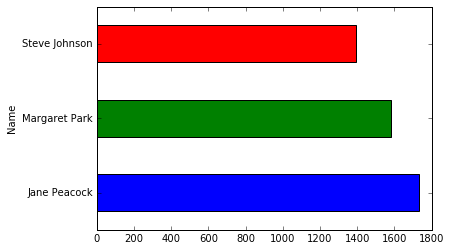

In [16]:
# Plot the sales for the employees
df["Total_sales"].plot(kind = 'barh')

<div class="alert alert-block alert-warning">
<b>TO DO LATER</b> 
Declare a figure and add axes, two different axes on the two sides of y axis.
</div>

In [17]:
# Find data on purchases from different countries. For each country, include:
#total number of customers
#total value of sales
#average value of sales per customer
#average order value

In [18]:
q = """WITH inter_table AS
        (
        SELECT 
            COUNT(DISTINCT(i.customer_id)) cust_count,
            SUM(i.total) total,
            SUM(i.total)/COUNT(DISTINCT(i.customer_id)) Avg_sales_customer,
            SUM(i.total)/COUNT(i.invoice_id) Avg_order_value,
            c.country country
        FROM invoice i
        INNER JOIN customer c ON i.customer_id = c.customer_id
        GROUP BY country
        )
        
        SELECT
            country_name,
            SUM(cust_count) customer_count,
            SUM(total) total_sales,
            SUM(Avg_sales_customer) avg_sales_customer,
            SUM(Avg_order_value) avg_order_value
        FROM
            (
            SELECT
                it.*,
                CASE
                    WHEN it.cust_count > 1 THEN country
                    ELSE "Other"
                END AS country_name,
                CASE
                    WHEN it.cust_count > 1 THEN 1
                    ELSE 0
                END AS sort
            FROM inter_table it
            )
        GROUP BY country_name
        ORDER BY sort DESC, total DESC
        """

In [19]:
df = show_tables(q)
df.set_index("country_name", drop=True, inplace=True)
df

,customer_count,total_sales,avg_sales_customer,avg_order_value
country_name,,,,
USA,13,1040.49,80.037692,7.942672
Canada,8,535.59,66.948750,7.047237
Brazil,5,427.68,85.536000,7.011148
France,5,389.07,77.814000,7.781400
Germany,4,334.62,83.655000,8.161463
Czech Republic,2,273.24,136.620000,9.108000
United Kingdom,3,245.52,81.840000,8.768571
Portugal,2,185.13,92.565000,6.383793
India,2,183.15,91.575000,8.721429


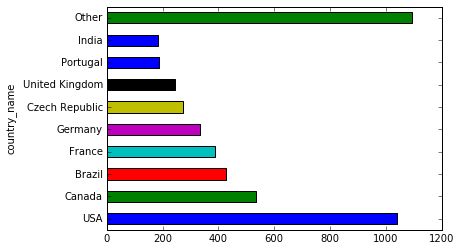

In [20]:
# Plot Horizontal Bar Graph to visualize the results of the country sales data
df['total_sales'].plot(kind='barh')

#### Visualize all the features along with the customer count to better understand the customer trend

In [21]:
#df.shape[0]

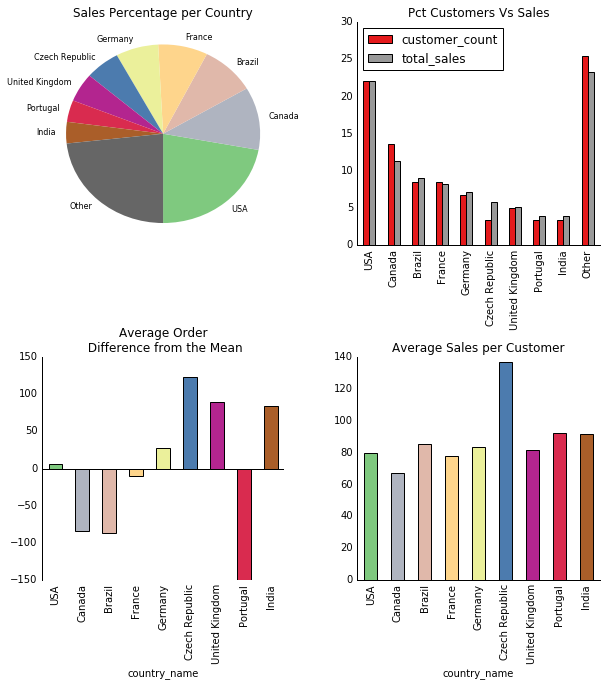

In [22]:
# Assign colors to the different countries in the data.
colors = [plt.cm.Accent(i) for i in np.linspace(0, 1, df.shape[0])]

# Initilaizing a figure to multiple graphs
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax1, ax2, ax3, ax4 = ax.flatten()
fig.subplots_adjust(hspace=.5, wspace=.3)

# Pie Chart for visualizing sales per country
for_pie = df['total_sales'].copy().rename('')

for_pie.plot.pie(
    ax = ax1,
    title = "Sales Percentage per Country",
    startangle=-90,
    colormap=plt.cm.Accent,
    fontsize=8,
    wedgeprops={'linewidth':0})

#  Bar Chart for Percentage of Customers Vs Sales
cust_sales = ["customer_count", "total_sales"]
pct_cust_sales = df[cust_sales].copy()
pct_cust_sales.index.name = ''

for c in cust_sales:
    pct_cust_sales[c] /= pct_cust_sales[c].sum()/100
pct_cust_sales.plot.bar(
    ax = ax2,
    title = "Pct Customers Vs Sales",
    colormap = plt.cm.Set1)

ax2.tick_params(top="off", left = "off", right="off", bottom = "off")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

# Bar Chart with difference from Mean for Average Order
avg_order = df['avg_order_value'].copy().rename('')
avg_order.drop("Other", inplace=True)

diff_avg_order = (avg_order - avg_order.mean())*100

diff_avg_order.plot.bar(
    ax = ax3,
    title = "Average Order\n Difference from the Mean",
    color = colors)

ax3.axhline(0, color='k')
ax3.tick_params(top="off", left = "off", right="off", bottom = "off")
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["bottom"].set_visible(False)

# Bar Graph for Average Customer sales per Country
avg_sales = df['avg_sales_customer'].copy().rename('')
avg_sales.drop('Other', inplace=True)
avg_sales.plot.bar(
    ax = ax4,
    title = "Average Sales per Customer",
    color = colors)

ax4.tick_params(top="off", left = "off", right="off", bottom = "off")
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)

# Update the font sie of the graphs
plt.rcParams.update({'font.size': 10})

<div class="alert alert-block alert-success">
<b>Analysis:</b> 
1. USA by the virtue of its sales becomes an important country to concentrate on and expand, also considering that it has the highest number of customers.

2. Czech have a higher sales inspite of the relatively lesser Percentage of Customers. Also it has a very high average order value and average sales per customer.

3. Germany and United Kingdom are similar to Czech with Higher average sales, average order value which make them good geographies to concentrate and improve the sales.

4. India among the countries with a lesser total sales needs a lot of attention for the reason being its average order per customer and average sales per customer is very high.

5. Portugal which has a higher Average Customer Sale, has a lower Average order value, which can lead to lesser profits, so the Company should look at increasing the average order value. 

6. Other countries like Brazil and Cananda seem to have similar problems like Portugal which needs more attention from the company.

</div>

### Query to find the percentage of albums with all tracks purchased and few tracks purchased with the Chinook store.

In [23]:
q = """WITH sub_query1 AS
	(
	SELECT * 
	FROM track 
	WHERE album_id in (
						select album_id FROM track 
						GROUP BY album_id
						HAVING count(track_id) > 2 
					  )
	),
	
	sub_query2 AS
	(
	SELECT 
		i.invoice_id, 
		t.album_id, 
		count(i.track_id) no_tracks,
		--count(DISTINCT(t.album_id))no_albums
		CASE WHEN (SELECT count(track_id) FROM track GROUP BY album_id HAVING album_id = t.album_id) = count(i.track_id) THEN 'Yes'
			 --WHEN (SELECT count(track_id) FROM track GROUP BY album_id HAVING album_id = t.album_id) = count(i.track_id) AND (count(i.track_id) < 3) THEN 'Ignore'
			 ELSE 'No'
		END as all_tracks_purchased
	FROM invoice_line i
	INNER JOIN sub_query1 t on i.track_id = t.track_id
	GROUP BY i.invoice_id, t.album_id
	),
	
	sub_query3 AS
	(
	SELECT * 
	FROM sub_query2
	GROUP BY invoice_id
	),
	
	sub_query4 AS
	(
	select count(*) FROM sub_query3
	)

SELECT 
	count(*) Yes_No_Count,
	ROUND(count(*)*100.0/(select count(*) FROM sub_query3), 2) Yes_No_Percentage
FROM sub_query3
GROUP BY all_tracks_purchased"""

In [24]:
df = show_tables(q)
df["tracks/albums"] = pd.Series(["Tracks", "Albums"])
df.set_index("tracks/albums", drop=True, inplace=True)
df

,Yes_No_Count,Yes_No_Percentage
tracks/albums,,
Tracks,500,81.83
Albums,111,18.17


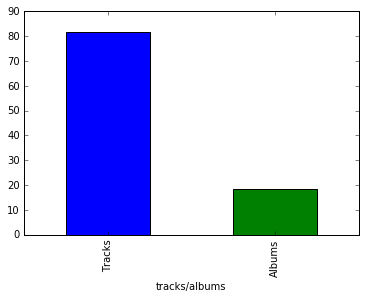

In [25]:
# Plot the results
df['Yes_No_Percentage'].plot.bar()

<div class="alert alert-block alert-success">
<b> Result of the Data Analysis </b>
Based on the findings, the Chinook Store should concentrate more on individual tracks which are purchased way more than the albums purchased by the customers. Only 18.17% are album purchases while the rest are Tracks.
</div>